In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("detection_results_validation.parquet")

## Class Mappings
```
0 - 'person'
1 - 'head'
2 - 'hand'
3 - 'face'
```

In [3]:
df = df.sample(10)

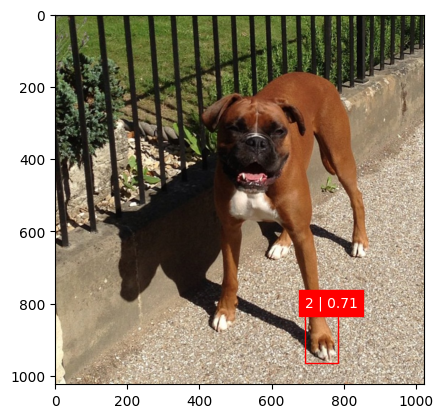

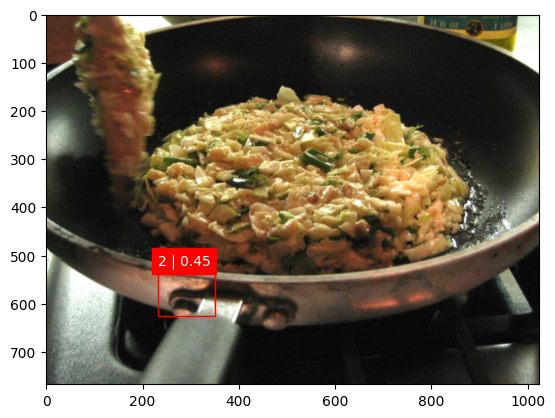

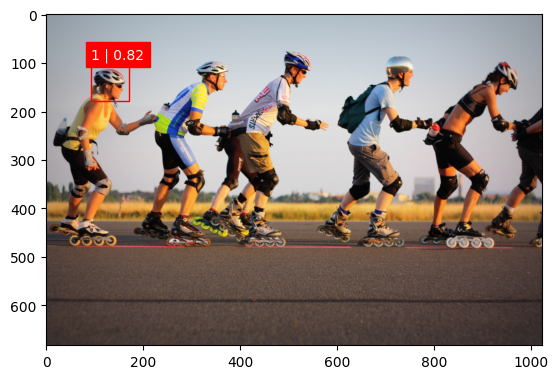

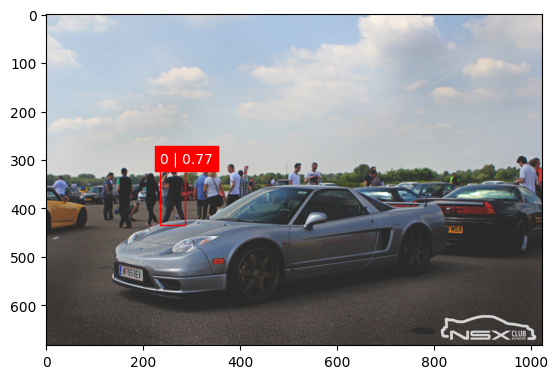

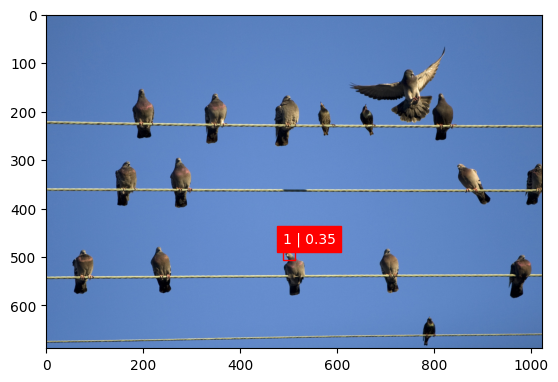

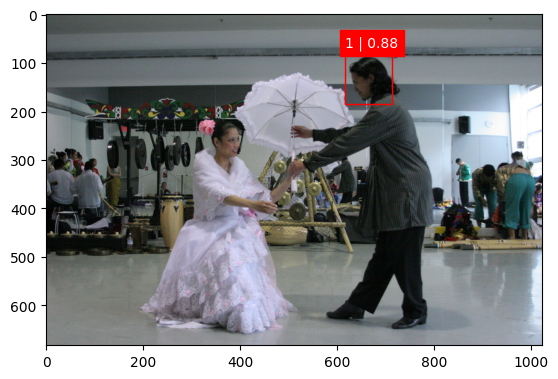

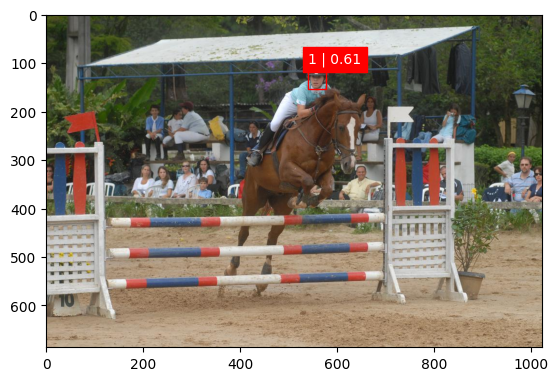

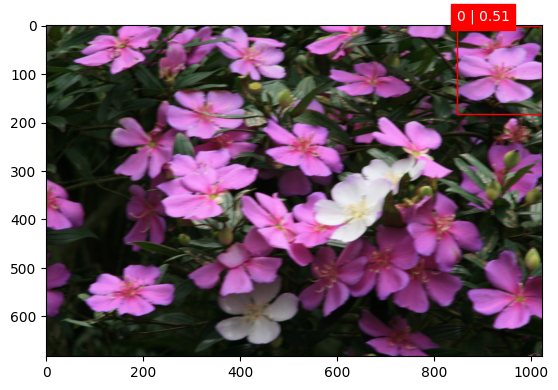

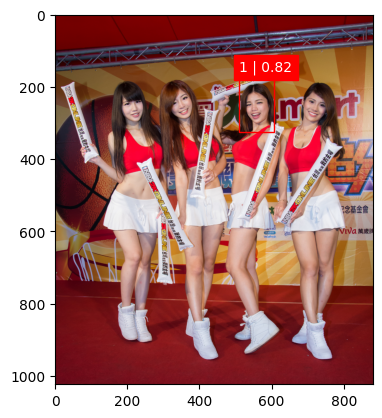

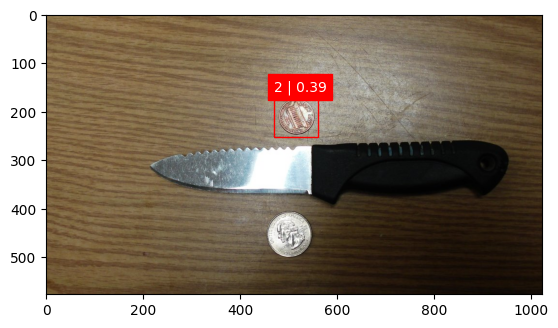

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from PIL import Image


# Loop through dataframe to plot bounding boxes
for index, row in df.iterrows():
    fig, ax = plt.subplots(1)

    img = Image.open(row["filename"])
    ax.imshow(img)


    # Extract bounding box
    x1, y1, x2, y2, classid, score = row["x1"], row["y1"], row["x2"], row["y2"], row["classid"], row["score"]
    width = x2 - x1
    height = y2 - y1
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

    label = f'{classid} | {score:.2f}'
    ax.text(x1, y1-10, label, color='white', backgroundcolor='red')

plt.show()